# 과제2. [평가]Mobile 고객 이탈 분석

* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 고객 이탈여부(CHURN)에 영향을 주는 요인을 찾아 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1 : 졸업 함,0 : 졸업 안함)	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간(분)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.가설수립

* 숫자형 최소 3개이상, 범주형 최소 2개 이상씩, 전체 6개의 변수를 도출, 가설을 수립하시오.

* 가설1 : INCOME(숫자형) -> 연 수입액이 높으면 번호 이동이 적을 것이다

* 가설2 : OVERAGE(숫자형) -> 월 초과 사용 시간이 많으면 번호 이동이 적을 것이다

* 가설3 : LEFTOVER(숫자형) -> 월 사용 잔여시간이 많으면 번호 이동이 적을 것이다

* 가설4 : AVERAGE_CALL_DURATION(숫자형) -> 평균 통화 시간이 많으면 번호 이동이 적을 것이다

* 가설5 : REPORTED_SATISFACTION(범주형) -> 만족도 설문에서 높은 평가를 할 수록 번호 이동이 적을 것이다

* 가설6 : CONSIDERING_CHANGE_OF_PLAN(범주형) -> 변경 계획 설문에서 변경 계획이 높다고 응할수록 번호 이동이 많을 것이다

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) INCOME	

In [3]:
var1 = 'INCOME'

1) 변수의 비즈니스 의미

* 연 수입액(달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치 방안

In [4]:
mobile[var1].isna().sum()

0

* NaN 없음

4) 가변수화 필요 여부

* 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [5]:
mobile[var1].describe()

count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


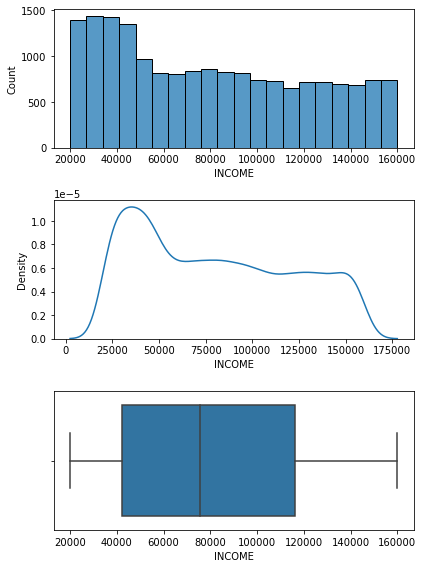

In [6]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile[var1], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(mobile[var1])

plt.subplot(3,1,3)
sns.boxplot(mobile[var1])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용

* 대부분의 연 수입액이 40000달러 ~ 120000달러 사이이다

8) 추가 분석해 볼 사항

> 연 수입액 구간을 2천 ~ 4천, 4천 ~ 8천, 8천 이상으로 구분해서 분석해 볼 필요가 있음

### 2) OVERAGE

In [4]:
var2 = 'OVERAGE'

1) 변수의 비즈니스 의미

* 월 초과사용 시간(분)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치 방안

In [5]:
mobile[var2].isna().sum()

0

* NaN 없음

4) 가변수화 필요 여부

* 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [6]:
mobile[var2].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


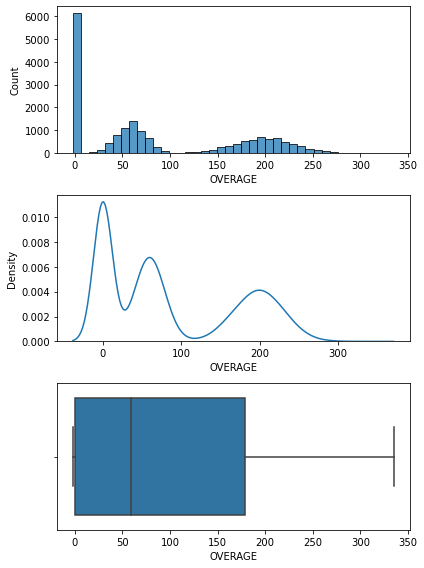

In [10]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile[var2], bins = 40)

plt.subplot(3,1,2)
sns.kdeplot(mobile[var2])

plt.subplot(3,1,3)
sns.boxplot(mobile[var2])

plt.tight_layout()
plt.show()

In [11]:
mobile.loc[mobile['OVERAGE']==0].shape[0] / mobile.shape[0]

0.3397777777777778

* 초과 통화 시간이 0분인 사람이 전체에 33%나 됨

7) 기초통계량과 분포를 통해서 파악한 내용

* 평균 초과 통화 시간은 86분
* 초과 통화 시간이 0분이 굉장히 많은 것으로 보임

8) 추가 분석해 볼 사항

> 초과 통화 시간이 0분인 사람을 제외하고 분포 확인 필요

### 추가) OVERAGE가 0이 아닌 데이터 기초통계량

In [12]:
temp = mobile.loc[mobile['OVERAGE'] > 0]

In [13]:
temp[var2].describe()

count    11883.000000
mean       130.292771
std         73.651705
min          3.000000
25%         60.000000
50%        132.000000
75%        200.000000
max        335.000000
Name: OVERAGE, dtype: float64

### OVERAGE가 0이 아닌 데이터 분포

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


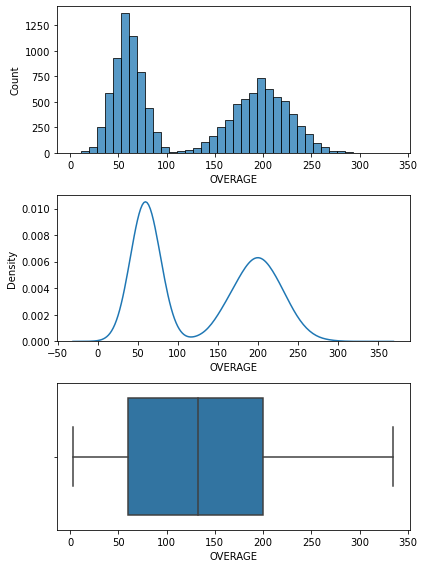

In [14]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(temp[var2], bins = 40)

plt.subplot(3,1,2)
sns.kdeplot(temp[var2])

plt.subplot(3,1,3)
sns.boxplot(temp[var2])

plt.tight_layout()
plt.show()

### 기초통계량과 분포를 통해서 파악한 내용

* 초과 통화 시간이 0분인 사람을 제외했을 때 평균 초과 통화 시간은 136분임
* 초과 통화 시간이 50분~200분 사이이다

8) 추가 분석해 볼 사항

> 히스토그램이나 밀집도 그래프를 보니 초과사용시간을 0분 ~ 100분, 100분 ~ 300분으로 범주화해서 볼 필요가 있어 보임

### 3) LEFTOVER

In [15]:
var3 = 'LEFTOVER'

1) 변수의 비즈니스 의미

* 월 사용 잔여시간(분)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치 방안

In [16]:
mobile[var3].isna().sum()

0

* NaN 없음

4) 가변수화 필요 여부

* 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [17]:
mobile[var3].describe()

count    18000.000000
mean        23.995500
std         26.860363
min          0.000000
25%          0.000000
50%         14.500000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


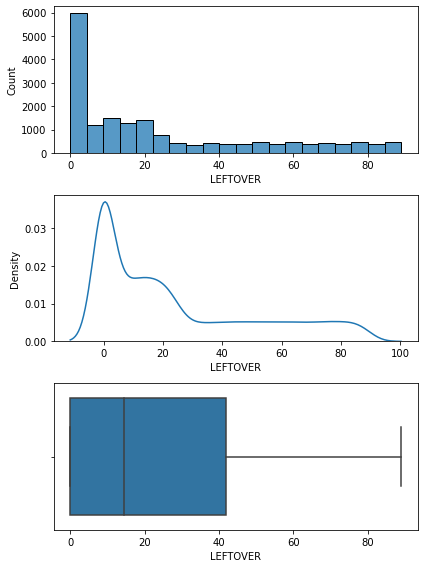

In [18]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile[var3], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(mobile[var3])

plt.subplot(3,1,3)
sns.boxplot(mobile[var3])

plt.tight_layout()
plt.show()

In [19]:
mobile.loc[mobile['LEFTOVER']==0].shape[0] / mobile.shape[0]

0.33144444444444443

7) 기초통계량과 분포를 통해서 파악한 내용

* 월 사용 잔여 시간이 0분인 사람이 전체에 33%나 됨
* 월 사용 잔여 시간이 40분 이상인 사람의 수는 비슷해 보임
* 평균 잔여 시간인 23분 이후부터 남은 잔여 시간이 많이 남은 사람은 줄어드는 추세

8) 추가 분석해 볼 사항

> 초과 통화 시간이 0분인 사람을 제외하고 분포 확인 필요

### 추가) LEFTOVER가 0이 아닌 데이터 기초통계량

In [20]:
temp = mobile.loc[mobile['LEFTOVER'] != 0]

In [21]:
temp[var3].describe()

count    12034.000000
mean        35.891557
std         25.537958
min          5.000000
25%         14.000000
50%         24.000000
75%         57.000000
max         89.000000
Name: LEFTOVER, dtype: float64

### LEFTOVER가 0이 아닌 데이터 분포

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


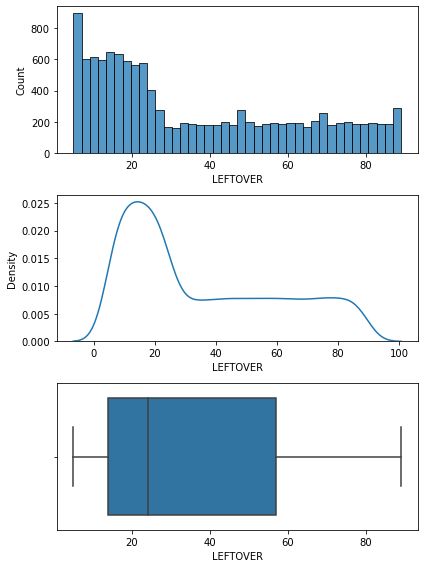

In [22]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(temp[var3], bins = 40)

plt.subplot(3,1,2)
sns.kdeplot(temp[var3])

plt.subplot(3,1,3)
sns.boxplot(temp[var3])

plt.tight_layout()
plt.show()

### 기초통계량과 분포를 통해서 파악한 내용

* 초과 통화 시간이 0분인 사람을 제외했을 때 평균 잔여 통화 시간은 35분임
* 잔여 통화 시간은 14분~60분 사이이다

8) 추가 분석해 볼 사항

* 히스토그램이나 밀집도 그래프를 보니 초과사용시간을 0분 ~ 23분, 23분 ~ 60분, 60분 이상으로 범주화해서 볼 필요가 있어 보임
* 해당 범주화를 통해 잔여시간이 어느정도 남았을 때 그룹이 번호이동이 낮거나 높은지 확인이 가능할 것으로 보임
* 해당 변수를 범주화 해서 분석한 결과로 잔여 시간이 얼마 남은 사람들에게 프로모션을 제공해 번호이동을 하지 않게 하는 전략을 짤 수 있을 것을 보임

### 4) AVERAGE_CALL_DURATION

In [23]:
var4 = 'AVERAGE_CALL_DURATION'

1) 변수의 비즈니스 의미

* 평균 통화시간(분)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치 방안

In [24]:
mobile[var4].isna().sum()

0

* NaN 없음

4) 가변수화 필요 여부

* 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [25]:
mobile[var4].describe()

count    18000.000000
mean         5.990944
std          4.398894
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         15.000000
Name: AVERAGE_CALL_DURATION, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


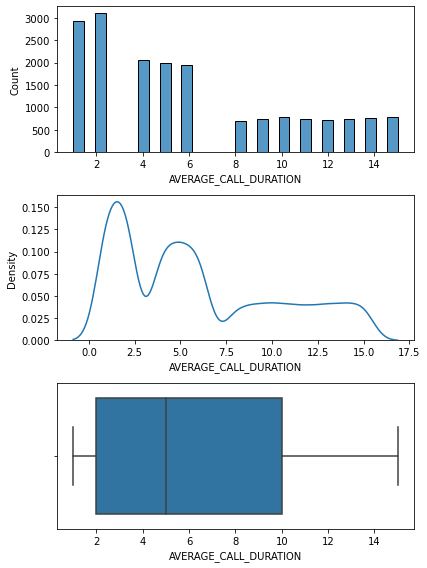

In [26]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile[var4], bins = 30)

plt.subplot(3,1,2)
sns.kdeplot(mobile[var4])

plt.subplot(3,1,3)
sns.boxplot(mobile[var4])

plt.tight_layout()
plt.show()

In [27]:
mobile.loc[mobile['LEFTOVER']==0].shape[0] / mobile.shape[0]

0.33144444444444443

7) 기초통계량과 분포를 통해서 파악한 내용

* 평균 통화 시간이 2분~10분 사이

8) 추가 분석해 볼 사항

> 히스토그램과 밀집도 그래프를 보니 평균 통화 시간을 크게 0분~4분, 4분~8분, 8분~15분3가지로 범주화시켜서 볼 필요가 있어 보임 

### 5) REPORTED_SATISFACTION

In [28]:
var5 = 'REPORTED_SATISFACTION'

1) 변수의 비즈니스 의미

* 만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	

2) 숫자, 범주?

* 범주

3) NaN 존재 유무 및 조치 방안

In [29]:
mobile[var5].isna().sum()

38

* NaN 존재 -> 평균(avg)로 결측치 채움

In [30]:
# 데이터프레임 복사
mobile_test = mobile.copy()

# 결측치를 평균(avg)로 채우기
mobile_test[var5].fillna('avg', inplace=True)

# 확인
mobile_test[var5].isna().sum()

0

4) 가변수화 필요 여부

* 범주형이므로 필요

In [31]:
# 가변수화
tip = pd.get_dummies(mobile_test, columns=[var5], drop_first=True)

# 확인
print(tip.head())

   COLLEGE  INCOME  OVERAGE  LEFTOVER     HOUSE  HANDSET_PRICE  \
0        1   47711      183        17  730589.0            192   
1        0   74132      191        43  535092.0            349   
2        1  150419        0        14  204004.0            682   
3        0  159567        0        58  281969.0            634   
4        1   23392        0         0  216707.0            233   

   AVERAGE_CALL_DURATION CONSIDERING_CHANGE_OF_PLAN  CHURN  \
0                      5                considering      0   
1                      2                         no      1   
2                      6                considering      0   
3                      1              never_thought      0   
4                     15                         no      1   

   REPORTED_SATISFACTION_sat  REPORTED_SATISFACTION_unsat  \
0                          0                            1   
1                          0                            1   
2                          0                   

5) 기초통계량(수치화)

In [32]:
print(mobile_test[var5].value_counts())
print('-'*50)
print(mobile_test[var5].value_counts()/len(mobile_test[var5]))

very_unsat    7072
very_sat      4562
unsat         3590
avg           1844
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
--------------------------------------------------
very_unsat    0.392889
very_sat      0.253444
unsat         0.199444
avg           0.102444
sat           0.051778
Name: REPORTED_SATISFACTION, dtype: float64


6) 분포 확인(시각화)

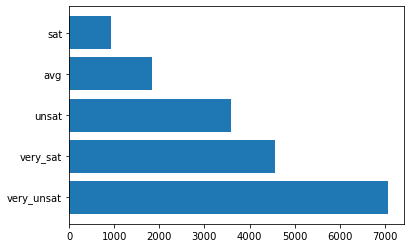

In [33]:
satisfaction = pd.Series(mobile_test[var5])
cnt = satisfaction.value_counts()

plt.barh(cnt.index, cnt.values)
plt.show()

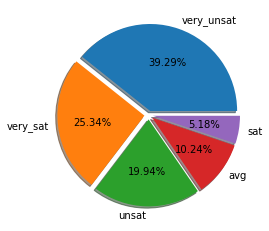

In [34]:
satisfaction = pd.Series(mobile_test[var5])
cnt = satisfaction.value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',explode = [0.05, 0.05, 0.05, 0.05, 0.05], shadow=True)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용

* 매우 불만족이거나 불만족인 사람이 전체의 59.23%(39.29%+19.94%)로 거의 60%가까운 사람이 불만족인 것으로 파악 됨

8) 추가 분석해 볼 사항

> 매우 불만족과 불만족, 매우 만족과 만족 두 그룹으로만 나눠서 볼 필요가 있어 보임

### 6)  CONSIDERING_CHANGE_OF_PLAN

In [35]:
var6 = 'CONSIDERING_CHANGE_OF_PLAN'

1) 변수의 비즈니스 의미

* 변경 계획 설문('never_thought', 'no', 'perhaps', 'considering', 'actively_looking_into_it')	

2) 숫자, 범주?

* 범주

3) NaN 존재 유무 및 조치 방안

In [36]:
mobile[var6].isna().sum()

0

* NaN 존재 하지 않음

4) 가변수화 필요 여부

* 범주형이므로 필요

In [37]:
# 가변수화
mobile_test = mobile.copy()
tip2 = pd.get_dummies(mobile_test, columns=[var6], drop_first=True)

# 확인
print(tip2.head())

   COLLEGE  INCOME  OVERAGE  LEFTOVER     HOUSE  HANDSET_PRICE  \
0        1   47711      183        17  730589.0            192   
1        0   74132      191        43  535092.0            349   
2        1  150419        0        14  204004.0            682   
3        0  159567        0        58  281969.0            634   
4        1   23392        0         0  216707.0            233   

   AVERAGE_CALL_DURATION REPORTED_SATISFACTION  CHURN  \
0                      5                 unsat      0   
1                      2                 unsat      1   
2                      6                 unsat      0   
3                      1            very_unsat      0   
4                     15                 unsat      1   

   CONSIDERING_CHANGE_OF_PLAN_considering  \
0                                       1   
1                                       0   
2                                       1   
3                                       0   
4                                  

5) 기초통계량(수치화)

In [38]:
print(mobile[var6].value_counts())
print('-'*50)
print(mobile[var6].value_counts()/len(mobile[var6]))

considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
--------------------------------------------------
considering                 0.396722
actively_looking_into_it    0.247389
no                          0.202444
never_thought               0.100222
perhaps                     0.053222
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64


6) 분포 확인(시각화)

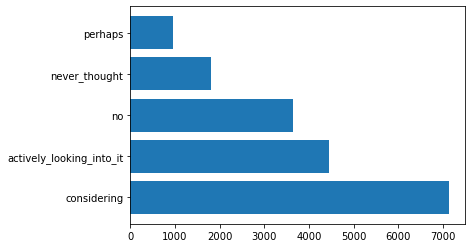

In [39]:
changeplan = pd.Series(mobile[var6])
cnt = changeplan.value_counts()

plt.barh(cnt.index, cnt.values)
plt.show()

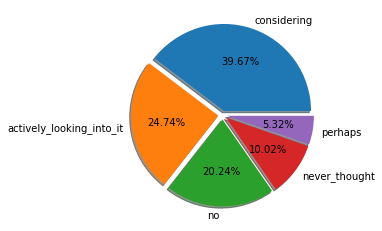

In [40]:
changeplan = pd.Series(mobile[var6])
cnt = changeplan.value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',explode = [0.05, 0.05, 0.05, 0.05, 0.05], shadow=True)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용

* 적극적으로 고민하거나 고민중인 사람이 전체의 64.41%로 변경 이동의 위험이 있는 사람이 꽤 높은 수준인 것으로 파악됨

8) 추가 분석해 볼 사항

> 적극적으로 고민 중과 고민중, 바꿀 고민이 없는 사람과 절대 바꾸지 않다고 응한 사람들 두 그룹으로만 나눠서 볼 필요가 있어 보임

### 7) CHURN(target)

In [41]:
var7 = 'CHURN'

1) 변수의 비즈니스 의미

* 이탈여부(1 : 이탈, 0 : 잔류)

2) 숫자, 범주?

* 범주

3) NaN 존재 유무 및 조치 방안

In [42]:
mobile[var7].isna().sum()

0

* NaN 존재 하지 않음

4) 가변수화 필요 여부

* 범주형이지만 이미 0과 1로 되어있으므로 가변수화 불필요

5) 기초통계량(수치화)

In [43]:
print(mobile[var7].value_counts())
print('-'*50)
print(mobile[var7].value_counts()/len(mobile[var7]))

0    9131
1    8869
Name: CHURN, dtype: int64
--------------------------------------------------
0    0.507278
1    0.492722
Name: CHURN, dtype: float64


6) 분포 확인(시각화)

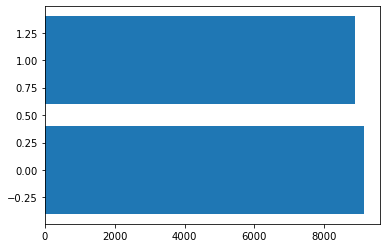

In [44]:
churn = pd.Series(mobile[var7])
cnt = churn.value_counts()

plt.barh(cnt.index, cnt.values)
plt.show()

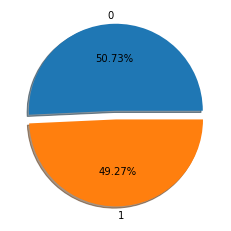

In [45]:
churn = pd.Series(mobile[var7])
cnt = churn.value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',explode = [0.05, 0.05], shadow=True)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용

* 고객 이탈 여부가 거의 반반으로 확인 됨

8) 추가 분석해 볼 사항

* 다양한 변수들이 고객 이탈에 영향을 줄 것으로 보이는데 생각보다 고객 이탈 여부가 반반으로 고르게 분포 된 것을 보고 조금 의아함
* 따라서, 고객이 이탈했을 때 가장 크게 영향을 주는 변수들이 무엇인지에 중점을 두고 파악해야할 것 같아 보임
* 추가적으로 다양한 변수들 중에서 고객이 어떠한 이유로 이탈을 안하는지에 대해서도 알아보면 좋을 것 같음

### 8) COLLEGE

In [46]:
var8 = 'COLLEGE'

1) 변수의 비즈니스 의미

* 대학졸업 여부(1 : 졸업 함,0 : 졸업 안함)	

2) 숫자, 범주?

* 범주

3) NaN 존재 유무 및 조치 방안

In [47]:
mobile[var8].isna().sum()

0

* NaN 존재 하지 않음

4) 가변수화 필요 여부

* 범주형이지만 0과 1로 이루어져 있므로 불필요

5) 기초통계량(수치화)

In [48]:
print(mobile[var8].value_counts())
print('-'*50)
print(mobile[var8].value_counts()/len(mobile[var8]))

1    9049
0    8951
Name: COLLEGE, dtype: int64
--------------------------------------------------
1    0.502722
0    0.497278
Name: COLLEGE, dtype: float64


6) 분포 확인(시각화)

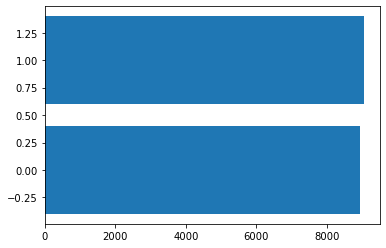

In [49]:
college= pd.Series(mobile[var8])
cnt = college.value_counts()

plt.barh(cnt.index, cnt.values)
plt.show()

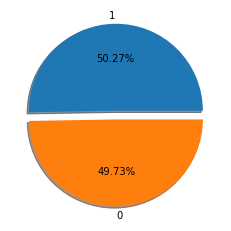

In [50]:
college = pd.Series(mobile_test[var8])
cnt = college.value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',explode = [0.05, 0.05], shadow=True)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용

* 대학 여부가 거의 반반으로 확인 됨

8) 추가 분석해 볼 사항

> 이변량 분석을 통해 대학을 다니는 사람과 안다니는 사람 간의 차이가 고객이탈여부가 영향을 주는지 확인해 볼 필요가 있어보임

### 9) 추가2

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [51]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) REPORTED_SATISFACTION --> CHURN

① 교차표(pd.crosstab())

In [52]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(mobile['CHURN'], mobile['REPORTED_SATISFACTION'])

REPORTED_SATISFACTION,avg,sat,unsat,very_sat,very_unsat
CHURN,,,,,
0,952,492,1792,2334,3543
1,854,440,1798,2228,3529


In [53]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(mobile['CHURN'], mobile['REPORTED_SATISFACTION'], normalize = 'all')

REPORTED_SATISFACTION,avg,sat,unsat,very_sat,very_unsat
CHURN,,,,,
0,0.053001,0.027391,0.099766,0.129941,0.19725
1,0.047545,0.024496,0.100100,0.124040,0.19647


② 시각화( Stacked Bar, Mosaic)

CHURN                         0         1
REPORTED_SATISFACTION                    
avg                    0.527132  0.472868
sat                    0.527897  0.472103
unsat                  0.499164  0.500836
very_sat               0.511618  0.488382
very_unsat             0.500990  0.499010


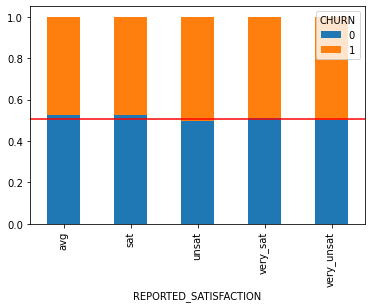

In [54]:
temp = pd.crosstab(mobile['REPORTED_SATISFACTION'], mobile['CHURN'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile['CHURN'].mean(), color = 'r')
plt.show()

* 비율만 비교하므로 양에 대한 비교는 할 수 없음

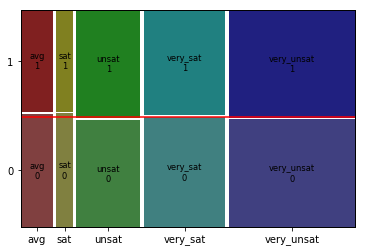

In [55]:
# Gender별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(mobile.sort_values(['REPORTED_SATISFACTION','CHURN']), ['REPORTED_SATISFACTION','CHURN'], gap=0.01)
plt.axhline(1- mobile['CHURN'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 만족도 설문조사 결과과 고객 이탈 여부에 영향을 주는 것 같아 보이지 않음
* 만족도 설문조사 결과의 신뢰성에 대한 의심이 생김
* 효과적인 설문 조사가 아닌 것으로 파악 -> 고객을 알기 위해서 실행한 방법중 하나인 고객 설문 조사를 다른 효과적인 것으로 대체하거나 개선할 필요가 있음

③ 가설검정(카이제곱검정)

In [56]:
# 먼저 집계
table = pd.crosstab(mobile['CHURN'], mobile['REPORTED_SATISFACTION'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 REPORTED_SATISFACTION  avg  sat  unsat  very_sat  very_unsat
CHURN                                                       
0                      952  492   1792      2334        3543
1                      854  440   1798      2228        3529
----------------------------------------------------------------------------------------------------
카이제곱통계량 6.8411009572056445
p-value 0.14452738878905066
기대빈도
 [[ 916.27201871  472.84912593 1821.38236277 2314.5254426  3587.97104999]
 [ 889.72798129  459.15087407 1768.61763723 2247.4745574  3484.02895001]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 자유도가 4인 것을 기반으로 카이제곱통계량을 보았을 때 6.84정도가 나오는 것으로 보아 만족도 설문조사와 고객이탈여부는 큰 관계가 없는 것으로 보임(보통 자유도의 2~3배 이상이면 차이가 있는 것으로 간주)
* p value 역시 0.14로 0.05보다 작게 나왔지만, 강한 관계라고는 볼 수 없음

#### 2) CONSIDERING_CHANGE_OF_PLAN --> CHURN

① 교차표(pd.crosstab())

In [57]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(mobile['CHURN'], mobile['CONSIDERING_CHANGE_OF_PLAN'])

CONSIDERING_CHANGE_OF_PLAN,actively_looking_into_it,considering,never_thought,no,perhaps
CHURN,,,,,
0,2278,3648,926,1823,456
1,2175,3493,878,1821,502


In [58]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(mobile['CHURN'], mobile['CONSIDERING_CHANGE_OF_PLAN'], normalize = 'all')

CONSIDERING_CHANGE_OF_PLAN,actively_looking_into_it,considering,never_thought,no,perhaps
CHURN,,,,,
0,0.126556,0.202667,0.051444,0.101278,0.025333
1,0.120833,0.194056,0.048778,0.101167,0.027889


② 시각화( Stacked Bar, Mosaic)

CHURN                              0         1
CONSIDERING_CHANGE_OF_PLAN                    
actively_looking_into_it    0.511565  0.488435
considering                 0.510853  0.489147
never_thought               0.513304  0.486696
no                          0.500274  0.499726
perhaps                     0.475992  0.524008


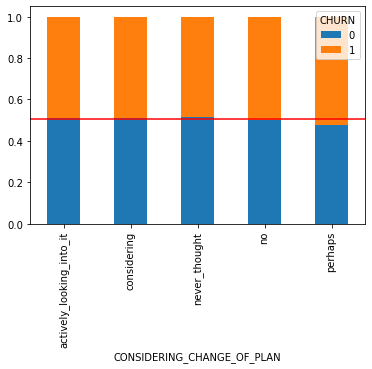

In [59]:
temp = pd.crosstab(mobile['CONSIDERING_CHANGE_OF_PLAN'], mobile['CHURN'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile['CHURN'].mean(), color = 'r')
plt.show()

* 비율만 비교하므로 양에 대한 비교는 할 수 없음

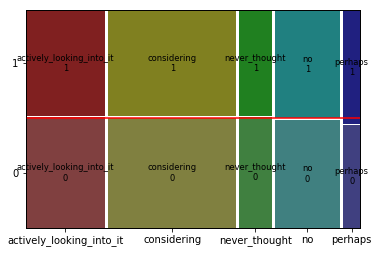

In [60]:
# Gender별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(mobile.sort_values(['CONSIDERING_CHANGE_OF_PLAN','CHURN']), ['CONSIDERING_CHANGE_OF_PLAN','CHURN'], gap=0.01)
plt.axhline(1- mobile['CHURN'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 변경 계획 설문조사 결과 역시 고객 이탈 여부에 영향을 주는 것 같아 보이지 않음
* 변경 계획  설문조사 결과의 신뢰성에 대한 의심이 생김
* 효과적인 설문 조사가 아닌 것으로 파악 -> 고객을 알기 위해서 실행한 방법중 하나인 고객 설문 조사를 다른 효과적인 것으로 대체하거나 개선할 필요가 있음
* 변경을 고려중인 많은 사람들이 거의 64%에 해당했지만, 이는 실제 이탈과 관련이 있다고 볼 수 없음

③ 가설검정(카이제곱검정)

In [61]:
# 먼저 집계
table = pd.crosstab(mobile['CHURN'], mobile['CONSIDERING_CHANGE_OF_PLAN'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 CONSIDERING_CHANGE_OF_PLAN  actively_looking_into_it  considering  \
CHURN                                                               
0                                               2278         3648   
1                                               2175         3493   

CONSIDERING_CHANGE_OF_PLAN  never_thought    no  perhaps  
CHURN                                                     
0                                     926  1823      456  
1                                     878  1821      502  
----------------------------------------------------------------------------------------------------
카이제곱통계량 5.421434419620689
p-value 0.2467222586679969
기대빈도
 [[2258.90794444 3622.47061111  915.12911111 1848.52022222  485.97211111]
 [2194.09205556 3518.52938889  888.87088889 1795.47977778  472.02788889]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 자유도가 4인 것을 기반으로 카이제곱통계량을 보았을 때 5.42정도가 나오는 것으로 보아 변경계획 설문조사와 고객이탈여부는 큰 관계가 없는 것으로 보임(보통 자유도의 2~3배 이상이면 차이가 있는 것으로 간주)
* p value 역시 0.24로 0.05보다 크게 나왔으므로 대립가설을 기각할 정도로 (거의)관계 없어 보임

#### 3) COLLEGE --> CHURN

① 교차표(pd.crosstab())

In [62]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(mobile['CHURN'], mobile['COLLEGE'])

COLLEGE,0,1
CHURN,,
0,4616,4515
1,4335,4534


In [63]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(mobile['CHURN'], mobile['COLLEGE'], normalize = 'all')

COLLEGE,0,1
CHURN,,
0,0.256444,0.250833
1,0.240833,0.251889


② 시각화( Stacked Bar, Mosaic)

CHURN           0         1
COLLEGE                    
0        0.515697  0.484303
1        0.498950  0.501050


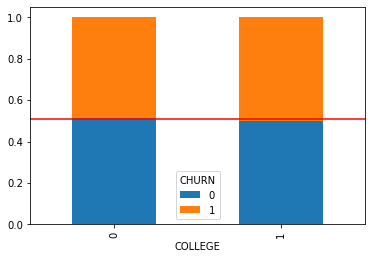

In [64]:
temp = pd.crosstab(mobile['COLLEGE'], mobile['CHURN'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile['CHURN'].mean(), color = 'r')
plt.show()

* 비율만 비교하므로 양에 대한 비교는 할 수 없음

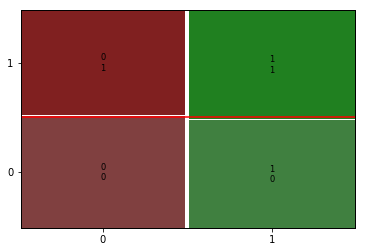

In [65]:
mosaic(mobile.sort_values(['COLLEGE','CHURN']), ['COLLEGE','CHURN'], gap=0.01)
plt.axhline(1- mobile['CHURN'].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 대학여부가 고객이탈에 영향을 주는 것 같지 않음

③ 가설검정(카이제곱검정)

In [66]:
# 먼저 집계
table = pd.crosstab(mobile['CHURN'], mobile['COLLEGE'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 COLLEGE     0     1
CHURN              
0        4616  4515
1        4335  4534
----------------------------------------------------------------------------------------------------
카이제곱통계량 4.982102934693503
p-value 0.025610833478220536
기대빈도
 [[4540.64338889 4590.35661111]
 [4410.35661111 4458.64338889]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 자유도가 1인 것을 기반으로 카이제곱통계량을 보았을 때 4.98정도가 나오는 것으로 보아 만족도 설문조사와 고객이탈여부는 약간의 관계는 있는 것을 보임(보통 자유도의 2~3배 이상이면 차이가 있는 것으로 간주)
* p value 역시 0.02로 0.05보다 작게 나왔지만, 강한 관계라고는 볼 수 없음

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) INCOME --> CHURN


① 그래프 : histogram, densityplot

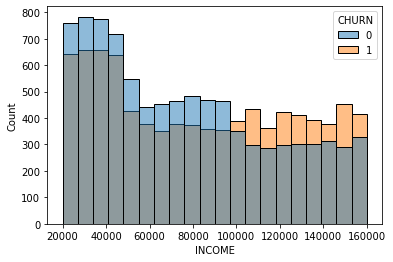

In [67]:
# histogram
sns.histplot(x='INCOME', data = mobile, hue = 'CHURN', bins = 20)
plt.show()

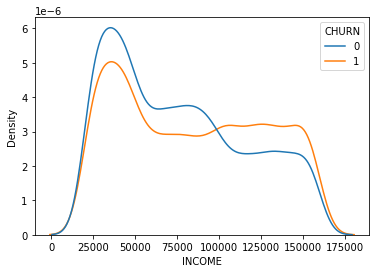

In [68]:
# densityplot
sns.kdeplot(x='INCOME', data = mobile, hue = 'CHURN')
plt.show()

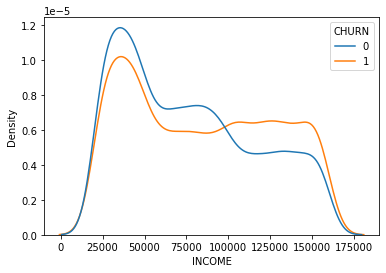

In [69]:
# sns.kdeplot(  , hue = , common_norm = False )
sns.kdeplot(x='INCOME', data = mobile, hue = 'CHURN', common_norm = False)
plt.show()

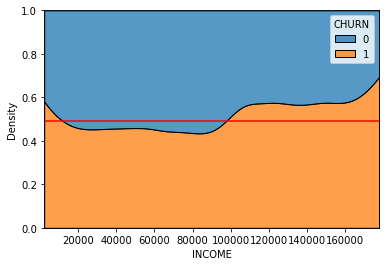

In [70]:
sns.kdeplot(x='INCOME', data = mobile, hue = 'CHURN', multiple = 'fill')
plt.axhline(mobile['CHURN'].mean(), color = 'r')
plt.show()


시각화를 통해 파악한 내용을 적어 봅시다.

* 9000 달러 이후부터 약간의 고객이탈이 발생하는 것으로 보임
* 평균 수입이 약 8000달러 인것으로 보았을 때, 평균 수입보다 높은 사람들이 고객 이탈이 많아지는 원인을 파악해볼 필요가 있어보임
* 평균 수입이 높은 사람들을 대상으로 혜택이나 프로모션을 진행해서 고객 이탈 방지 전략을 짜면 좋을 것 같음

② 수치화 : 로지스틱회귀

In [71]:
model = sm.Logit(mobile['CHURN'], mobile['INCOME'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> p value가 0으로 나온 결과를 보았을때 월 수입과 고객이탈 여부는 관계가 있는 것으로 보임

#### 1-2) INCOME_class --> CHURN


In [72]:
mobile_test = mobile.copy()

bins = [20000, 50000, 80000, np.inf]
labels = ['20000~50000dollar', '50000~80000dollar', '80000dollar~']
mobile_test['INCOME_class'] = pd.cut(mobile_test['INCOME'], bins=bins, labels=labels, include_lowest=True)
mobile_test[['INCOME', 'INCOME_class','CHURN']].head(5)

,INCOME,INCOME_class,CHURN
0,47711,20000~50000dollar,0
1,74132,50000~80000dollar,1
2,150419,80000dollar~,0
3,159567,80000dollar~,0
4,23392,20000~50000dollar,1


In [73]:
mobile_test['INCOME_class'].value_counts()

80000dollar~         8464
20000~50000dollar    6002
50000~80000dollar    3534
Name: INCOME_class, dtype: int64

② 시각화( Stacked Bar, Mosaic)

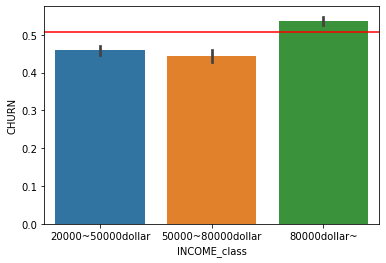

In [74]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x="INCOME_class", y="CHURN", data=mobile_test)
plt.axhline(1-mobile_test['CHURN'].mean(), color = 'r')
plt.show()

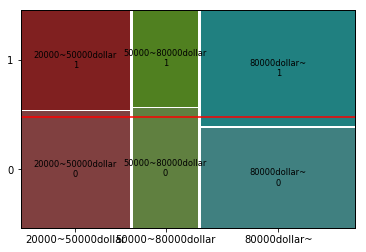

In [75]:
mosaic(mobile_test.sort_values(['INCOME_class','CHURN']), ['INCOME_class','CHURN'], gap=0.01)
plt.axhline(1- mobile_test['CHURN'].mean(), color = 'r')
plt.show()

③ 가설검정(카이제곱검정)

In [76]:
# 먼저 집계
table = pd.crosstab(mobile_test['CHURN'], mobile_test['INCOME_class'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 INCOME_class  20000~50000dollar  50000~80000dollar  80000dollar~
CHURN                                                           
0                          3247               1961          3923
1                          2755               1573          4541
----------------------------------------------------------------------------------------------------
카이제곱통계량 124.2654292086811
p-value 1.0377790558996056e-27
기대빈도
 [[3044.68122222 1792.71966667 4293.59911111]
 [2957.31877778 1741.28033333 4170.40088889]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 자유도가 2인 것을 기반으로 카이제곱통계량을 보았을 때 124.84정도가 나오는 것으로 보아 범주화한 연 수입과 고객이탈여부는 큰 관계가 있는것으로 보임(보통 자유도의 2~3배 이상이면 차이가 있는 것으로 간주)
* p value 역시 0에 수렴

#### 2) OVERAGE --> CHURN


① 그래프 : histogram, densityplot

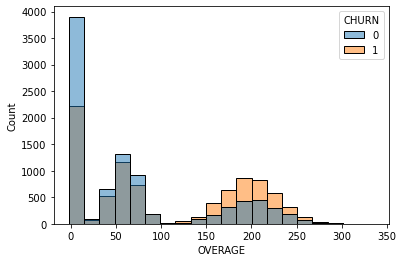

In [77]:
# histogram
sns.histplot(x='OVERAGE', data = mobile, hue = 'CHURN', bins = 20)
plt.show()

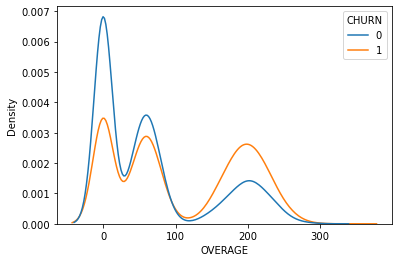

In [78]:
# densityplot
sns.kdeplot(x='OVERAGE', data = mobile, hue = 'CHURN')
plt.show()

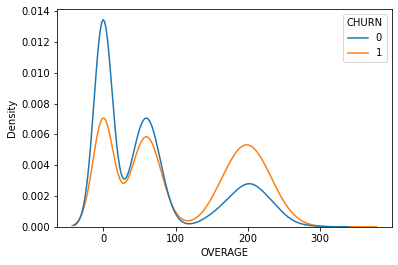

In [79]:
# sns.kdeplot(  , hue = , common_norm = False )
sns.kdeplot(x='OVERAGE', data = mobile, hue = 'CHURN', common_norm = False)
plt.show()

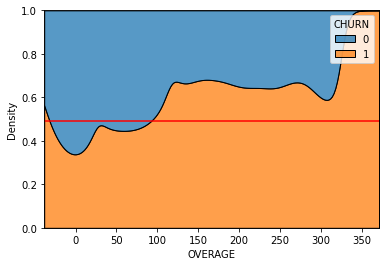

In [80]:
sns.kdeplot(x='OVERAGE', data = mobile, hue = 'CHURN', multiple = 'fill')
plt.axhline(mobile['CHURN'].mean(), color = 'r')
plt.show()


시각화를 통해 파악한 내용을 적어 봅시다.

* 초과 통화시간이 100분 이상부터 고객 이탈율이 높아지는 것을 볼 수 있음

② 수치화 : 로지스틱회귀

In [81]:
model = sm.Logit(mobile['CHURN'], mobile['OVERAGE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> p value가 3.521095e-97 0에 수렴하는 것으로 보았을때 초과통화시간과 고객이탈 여부는 강한 관계가 있는 것으로 보임

#### 3) LEFTOVER --> CHURN


① 그래프 : histogram, densityplot

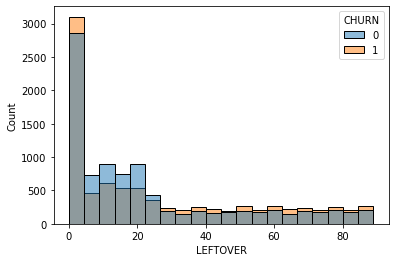

In [82]:
# histogram
sns.histplot(x='LEFTOVER', data = mobile, hue = 'CHURN', bins = 20)
plt.show()

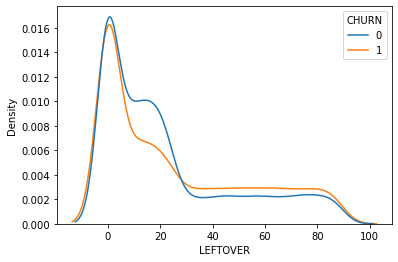

In [83]:
# densityplot
sns.kdeplot(x='LEFTOVER', data = mobile, hue = 'CHURN')
plt.show()

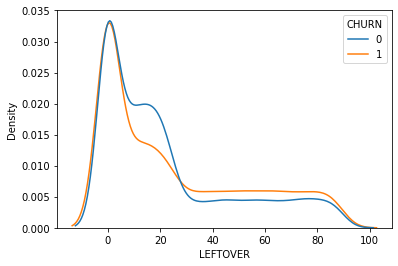

In [84]:
# sns.kdeplot(  , hue = , common_norm = False )
sns.kdeplot(x='LEFTOVER', data = mobile, hue = 'CHURN', common_norm = False)
plt.show()

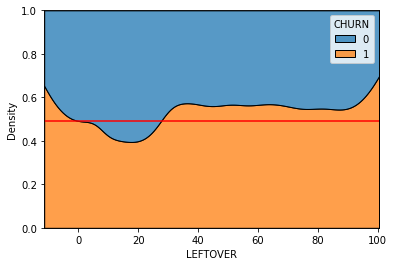

In [85]:
sns.kdeplot(x='LEFTOVER', data = mobile, hue = 'CHURN', multiple = 'fill')
plt.axhline(mobile['CHURN'].mean(), color = 'r')
plt.show()


시각화를 통해 파악한 내용을 적어 봅시다.

* 남은 통화시간 23분 이상부터 고객 이탈율이 높아지는 것을 볼 수 있음

② 수치화 : 로지스틱회귀

In [86]:
model = sm.Logit(mobile['CHURN'], mobile['LEFTOVER'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692532
         Iterations 3
LEFTOVER    0.000003
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> p value가 0인것으로 보았을때 남은통화시간과 고객이탈 여부는 강한 관계가 있는 것으로 보임

#### 3) LEFTOVER --> CHURN


① 그래프 : histogram, densityplot

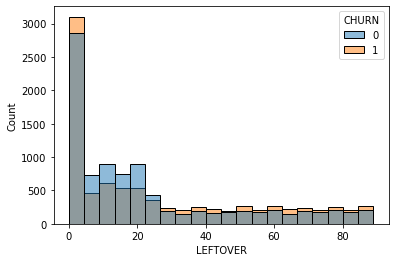

In [87]:
# histogram
sns.histplot(x='LEFTOVER', data = mobile, hue = 'CHURN', bins = 20)
plt.show()

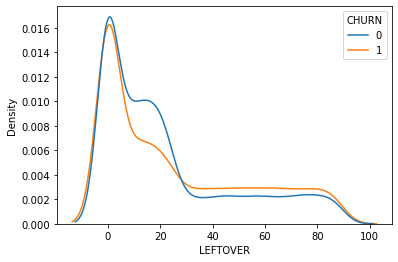

In [88]:
# densityplot
sns.kdeplot(x='LEFTOVER', data = mobile, hue = 'CHURN')
plt.show()

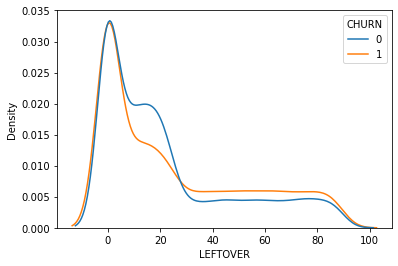

In [89]:
# sns.kdeplot(  , hue = , common_norm = False )
sns.kdeplot(x='LEFTOVER', data = mobile, hue = 'CHURN', common_norm = False)
plt.show()

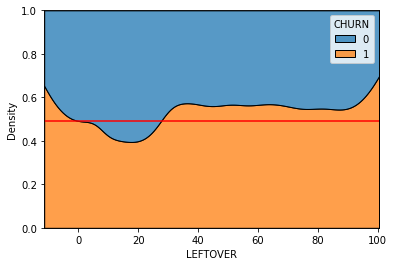

In [90]:
sns.kdeplot(x='LEFTOVER', data = mobile, hue = 'CHURN', multiple = 'fill')
plt.axhline(mobile['CHURN'].mean(), color = 'r')
plt.show()


시각화를 통해 파악한 내용을 적어 봅시다.

* 남은 통화시간 23분 이상부터 고객 이탈율이 높아지는 것을 볼 수 있음

② 수치화 : 로지스틱회귀

In [91]:
model = sm.Logit(mobile['CHURN'], mobile['LEFTOVER'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692532
         Iterations 3
LEFTOVER    0.000003
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> p value가 0인것으로 보았을때 남은통화시간과 고객이탈 여부는 강한 관계가 있는 것으로 보임

#### 4) AVERAGE_CALL_DURATION --> CHURN


① 그래프 : histogram, densityplot

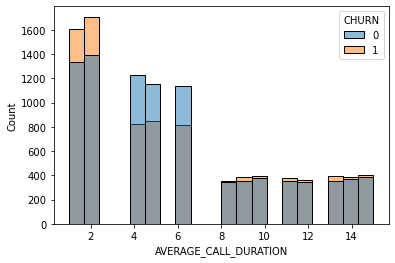

In [92]:
# histogram
sns.histplot(x='AVERAGE_CALL_DURATION', data = mobile, hue = 'CHURN', bins = 20)
plt.show()

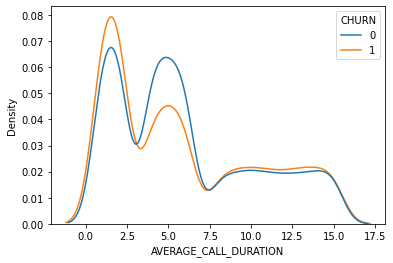

In [93]:
# densityplot
sns.kdeplot(x='AVERAGE_CALL_DURATION', data = mobile, hue = 'CHURN')
plt.show()

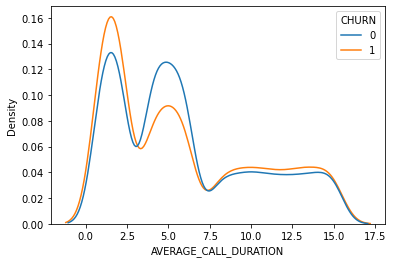

In [94]:
# sns.kdeplot(  , hue = , common_norm = False )
sns.kdeplot(x='AVERAGE_CALL_DURATION', data = mobile, hue = 'CHURN', common_norm = False)
plt.show()

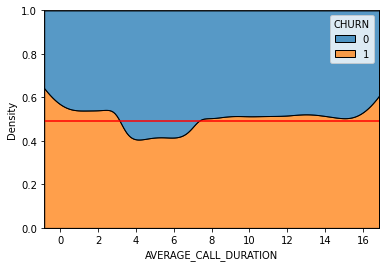

In [95]:
sns.kdeplot(x='AVERAGE_CALL_DURATION', data = mobile, hue = 'CHURN', multiple = 'fill')
plt.axhline(mobile['CHURN'].mean(), color = 'r')
plt.show()


시각화를 통해 파악한 내용을 적어 봅시다.

* 평균 통화 시간이 3~8분 사이 고객은 이탈율이 낮은 것으로 보임
* 평균 통화 시간이 3분 보다 적거나 8분 이상인 극단 적인 통화 시간 사이에서 고객 이탈이 이루어지는 것으로 보임

② 수치화 : 로지스틱회귀

In [96]:
model = sm.Logit(mobile['CHURN'], mobile['AVERAGE_CALL_DURATION'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3
AVERAGE_CALL_DURATION    0.03783
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> p value가 0.03인것으로 보았을때 평균통화시간과 고객이탈 여부는 강한관계보단 약간의 관계가 있는 것으로 보임

## 4.관계 정리

### 1) 강한관계의 변수

> 연수익, 연수익 범주화(추가), 월 초과 사용 시간, 남은 통화 시간

### 2) 약한관계의 변수

> 평균 통화 시간,

### 3) 관계 없음

> 만족도 설문, 변경 계획 설문, 대학졸업 여부

## 5.추가 분석

### [결론]
만족도 조사, 변경 계획 설문조사 결과, 대학 여부와 같은 범주형 변수가 고객 이탈 여부에 영향을 주는 것 같아 보이지 않음
* 설문조사 결과의 신뢰성에 대한 의심이 생김 ->효과적인 설문 조사가 아닌 것으로 파악됨
    * 고객을 알기 위해서 실행한 방법중 하나인 고객 설문 조사를 다른 효과적인 것으로 대체하거나 개선할 필요가 있음
* 고객의 입장에서는 자기가 만족을 하는지, 변경 계획이 있는지와 상관없이 남은 통화 시간, 연 수익과 같은 금전적인 부분에서 번호 이동을 결심하는 것으로 보임
* 여러 변수 데이터들이 존재했지만 결론적으로 고객 이탈 여부가 거의 반반으로 고객 이탈이 심해보이진 않아서 분석에 약간 어려움이 있었음

###  [가설 검증]
1. 1번 가설에서 연 수입이 높은 사람은 고소득층, 전문적인 일에 종사한다고 생각해서 번호 이동시 타격이 크기 때문에 낮은 이탈율을 보일 것 같았는데 그렇지 않았다
2. 초과 통화 시간이 높으면 고객 이탈이 높아지는 것을 확인함
4. 남은 통화 시간이 많을 수록 고객 이탈이 낮아지는 것을 확인함
5~6. 설문조사는 큰 영향을 끼치지 않는다

In [99]:
mobile_test = mobile.copy()

mobile_test['OVERandLEFT HIGH'] = (mobile_test['OVERAGE'] >=110) & (mobile_test['LEFTOVER']>=25)
mobile_test['OVER HIGH'] = mobile_test['OVERAGE'] > mobile_test['LEFTOVER']
mobile_test['LEFT HIGH'] = mobile_test['OVERAGE'] < mobile_test['LEFTOVER']
mobile_test['OVERandLEFT ZERO'] = (mobile_test['OVERAGE'] == 0) & (mobile_test['LEFTOVER']==0)

mobile_test.head(10)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN,OVERandLEFT HIGH,OVER HIGH,LEFT HIGH,OVERandLEFT ZERO
0,1,47711,183,17,730589.0,192,5,unsat,considering,0,False,True,False,False
1,0,74132,191,43,535092.0,349,2,unsat,no,1,True,True,False,False
2,1,150419,0,14,204004.0,682,6,unsat,considering,0,False,False,True,False
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0,False,False,True,False
4,1,23392,0,0,216707.0,233,15,unsat,no,1,False,False,False,True
5,1,119591,0,43,231309.0,714,1,very_sat,considering,0,False,False,True,False
6,1,99548,235,0,238561.0,294,6,very_unsat,actively_looking_into_it,1,False,True,False,False
7,1,63338,50,57,394791.0,362,1,sat,no,0,False,False,True,False
8,1,133496,163,11,166179.0,864,5,NaN,actively_looking_into_it,1,False,True,False,False
9,1,155145,29,18,717451.0,671,4,unsat,considering,0,False,True,False,False


In [101]:
print(mobile_test['OVERandLEFT HIGH'].value_counts())
print('-'*50)
print(mobile_test['OVERandLEFT HIGH'].value_counts()/len(mobile_test['OVERandLEFT HIGH']))

False    16036
True      1964
Name: OVERandLEFT HIGH, dtype: int64
--------------------------------------------------
False    0.890889
True     0.109111
Name: OVERandLEFT HIGH, dtype: float64


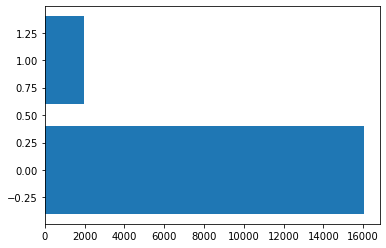

In [103]:
overandlefthigh= pd.Series(mobile_test['OVERandLEFT HIGH'])
cnt = overandlefthigh.value_counts()

plt.barh(cnt.index, cnt.values)
plt.show()

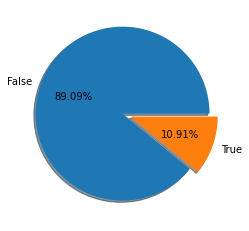

In [104]:
overandlefthigh = pd.Series(mobile_test['OVERandLEFT HIGH'])
cnt = overandlefthigh.value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',explode = [0.05, 0.05], shadow=True)
plt.show()

CHURN                    0         1
OVERandLEFT HIGH                    
False             0.526690  0.473310
True              0.348778  0.651222


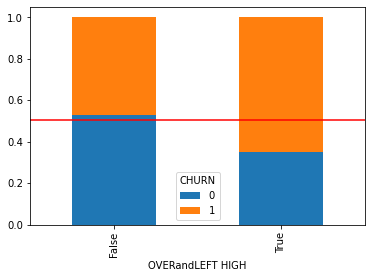

In [106]:
temp = pd.crosstab(mobile_test['OVERandLEFT HIGH'], mobile_test['CHURN'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile_test['CHURN'].mean(), color = 'r')
plt.show()

CHURN             0         1
OVER HIGH                    
False      0.616653  0.383347
True       0.436067  0.563933


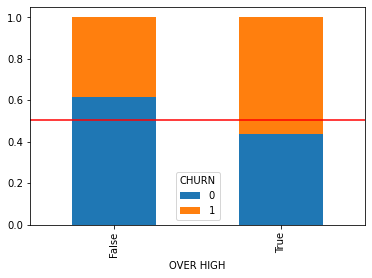

In [107]:
temp = pd.crosstab(mobile_test['OVER HIGH'], mobile_test['CHURN'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile_test['CHURN'].mean(), color = 'r')
plt.show()

CHURN             0         1
LEFT HIGH                    
False      0.453577  0.546423
True       0.645251  0.354749


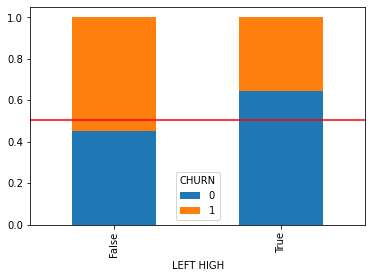

In [108]:
temp = pd.crosstab(mobile_test['LEFT HIGH'], mobile_test['CHURN'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile_test['CHURN'].mean(), color = 'r')
plt.show()

CHURN                   0        1
OVERandLEFT ZERO                  
False             0.50216  0.49784
True              0.54756  0.45244


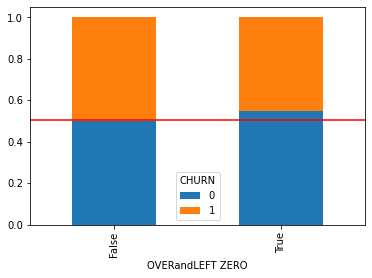

In [110]:
temp = pd.crosstab(mobile_test['OVERandLEFT ZERO'], mobile_test['CHURN'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile_test['CHURN'].mean(), color = 'r')
plt.show()